# Problem 1 (Multiplying Polynomials) (40 Points)
In this coding assignment, the inputs will be polynomials. As done in class, a degree n polynomial p(x) = p0 + p1x + p2x2 + ··· + pnxn is represented as an array P[0 : n] where P[i] contains the coefficient pi. The input to the functions you write should be two lists P [0 : n] and Q[0 : n], and the output should be R[0 : 2n] which contains the coefficients of the polynomial r(x) = p(x)q(x).

#### (a) Implement the naive multiplication (which takes O(n2) time). Recall, this just implements the formula for rk given as (1) in the Lecture 6 notes. (5 points)

In [183]:
'''
input: P, Q are the two lists of polynomial coefficients
output: R, runtime, and countime
    R = the product of the two polynomials
    run_time = the time measured with the time module of Python 3
    count_time = the time as arithmetic operations

given that P and Q are the same length [1: n], they must have the same order.
'''

# import statements
import math
import time

# initialize global variable to measure time in "arithmatic operations"
count_time = 0

def multi_poly(P, Q, run_time = 0):
    global count_time
    # initalize empty array R to store coefficients of product polynomial
    R = []; n = len(P) - 1; val = 0; time_val = time.time()
    # base cases
    if (len(P) == 0):
        return ([],0,0)
    # for k <= 2n
    for k in range(0, 2 * n + 1):
        if (k <= n):
            val = 0
            # for i <= k
            for i in range(0, k + 1):
                val = val + (P[i] * Q[k-i])
                count_time = count_time + 1
        else:
            val = 0
            for i in range(k - n, n + 1):
                val = val + (P[i] * Q[k - i])
                count_time = count_time + 1
                
        R.append(val)
        
    run_time = time.time() - time_val
    count_time = count_time + n
    return (R, run_time, count_time)

In [184]:
multi_poly([1,1],[2,3])

([2, 5, 3], 6.198883056640625e-06, 5)

#### (b) Implement Karatsuba’s algorithm done in class. If history is a guide, this is tricky to code mainly because you need to handle indices carefully. So be careful. (15 points)

In [188]:
''' 
input: Coefficients of two degree n polynomials: arrays P[0:n] 
        and Q[0:  n]
output: Coefficient of the product polynomial: array R[0: 2n].
size: n, the length of P and Q

'''
import time
first_run = False

def karat_multi_poly(P, Q):
    global first_run
    # indexing from starting number to ending number
    n = len(P) - 1; Px = []; Qx = []
    # base cases, 
    if len(P) < 2:
        # return R using naive multiplication
        return [P[0]*Q[0]]
    # half and floor the array
    m = math.ceil(n/2)
    # loop through for all numbers 0 <= i <= m -1
    #initalize new arrays Px and Qx
    for i in range(0,m):
        Px.append(P[i] + P[m + i])
        Qx.append(Q[i] + Q[m + i])

    if (len(Px) < len(P) - len(Px)):
        Px = Px + P[n:]
        Qx = Qx + Q[n:]
    

    #R1 = multi_poly(P[0:m], Q[0:m])[0]
    R1 = karat_multi_poly(P[0:m], Q[0:m])
    
    #R2 = multi_poly(P[m:n + 1], Q[m:n + 1])[0]
    R2 = karat_multi_poly(P[m:n + 1], Q[m:n + 1])
    
    # array index range: [0: 2m]
    # has coefficients of (p1(x)+ p2(x)) * (q1(x)+ q2(x))

    R3 = karat_multi_poly(Px[0:m + 1],Qx[0:m + 1])

    R4 = []
    
    # loop through all numbers 0 <= i <2m
    
    while len(R1) < len(R3):
        R1.append(0)

    for i in range(len(R3)):
        R4.append(R3[i] - R1[i] - R2[i])
    
    R1_pad = [0]*(len(P) + len(Q) - 1)
    R2_pad = [0]*(len(P) + len(Q) - 1)
    R4_pad = [0]*(len(P) + len(Q) - 1)
    R1_pad[:len(R1)] = R1
    R2_pad[len(R2_pad) - len(R2): ] = R2
    R4_pad[m: m + len(R4)] = R4

    R = [0]*(len(P) + len(Q) - 1)
    
    # loop through all numbers 0 <= i <2n
    for i in range(len(R)):
        R[i] = R1_pad[i] + R4_pad[i] + R2_pad[i]
        # assume an array returns 0 if indexed out of range
        # if i is less than range return 0
        # if i is greater than range return 0
    #run_time = time.time() - time_val

    return R

In [189]:
count_time = 0
karat_multi_poly([1,1,1],[2,3,1])

[2, 5, 6, 4, 1]

In [190]:
count_time = 0
karat_multi_poly([1, 1], [2, 3])

[2, 5, 3]

In [107]:
karat_multi_poly([], [])

([], 9.5367431640625e-07, 15)

#### (c) Given a number n, consider the polynomial pn(x) whose coefficient array Pn[0 : n] is defined as the first (n + 1)-digits of π. 
So, for instance,
p0(x)=3, p1(x)=3+x, p2(x)=3+x+4x2, p3(x)=3+x+4x2 +x3,...
Define rn(x) := pn(x) · pn(x), the square of the pn(x) polynomial. Let Sn be the sum of squares of the coefficients of the polynomial rn. So, for example, S0 = 81 (since r0(x) = p0(x)2 = 9 and so S0 =92),andS1 =118(sincer1(x)=p1(x)2 =9+6x+x2,and92 +62 +12 =118.)
Write code calling the Karatsuba routine to find out S20000? Note: we need to at the 20001 digits of π to answer this question. (5 points)
Even Karatsuba may take around a minute to run – don’t panic.

In [181]:
'''
helper function reading the n first numbers of pi and returns a list containing these,
the function was given on canvas
'''

def read_pi(n):
    #opens the file name "pi" and reads the first n digits
    #puts it in the list pi, and returns that list
    pi = list()
    f = open('pi','r')
    for i in range(n + 1):
        d = f.read(1)
        pi.append(int(d))
    return pi

In [111]:
def square_pi_poly(n):
    # s is the sum of squares of the coefficients of the polynomial
    s = 0
    # read the first (n + 1) digits of pi
    P = read_pi(n)
    # TODO -- comment out
    # when we have karatsuba
    # call karatsuba's algorithm to get R, i.e.,
    # the square of the P(n) polynomial
    R = multi_poly(P, P)
    n = len(R[0])
    for i in range(0, n):
        s = s + math.pow(R[0][i],2)
    
    return s

In [112]:
print(square_pi_poly(20000))
# S_20000 = 2192522453709283.0

2192522453709283.0


#### (d) In this part, you will find out at roughly what n does the Karatsuba algorithm “beat” the Naive algo- rithm. But we will measure “time” in two ways.

*(i) First, we measure time using the time module of Python 3. Plot, as a function of n, n going from 1 to 10, 000 in jumps of 100, the time taken by both algorithms to compute rn(x). Show these two “curves” overlaid on the same plot. Clearly mark which is which. At roughly what n do you see Karatsuba “beating” the naive algorithm (if at all)? (5 points)*

In [191]:

'''
Create loop that goes iterates through numbers a 0 to 10000 with step of 100, 
Calculates time to run both algorithms for a numbers of pi, and stores each runtime 
in pandas dataframe
''' 


import pandas as pd
# name columns
cols = ['naive', 'karatsuba']
# create dataframe
df = pd.DataFrame(columns=cols, index=range(0, 10001, 100))
# loop through each value
for a in range(0, 10001, 100):
    P = read_pi(a)
    print(P)
    # add time to run for naive algorithm
    df.loc[a].naive = multi_poly(P,P)[1]
    # add time to run for 'fast' algorithm
    df.loc[a].karatsuba = karat_multi_poly(P,P)[1]

### NEED TO DROP TOP COLUMN AND REPLACE WITH 1 INDEX AND VALUES?
#plot the data against itself 
df.plot(title = 'Number \'n\' vs. Time Taken to Implement', xlabel= 'Number \'n\'', ylabel= 'Time (s)')


[3]


IndexError: list index out of range

# Acording to this diagram, Karatsuba "beats" the native algorithm at roughly n = ____

*(ii) Second, we measure time as “arithmetic operations”. Every time you add, subtract, or multiply two entries from some array (either P or Q or something called recursively), you increment a global counter. This way, at the end of the code, you will know how many such operations have been performed. Note that we are not counting incrementing indices, or comparing, or anything else in the running time. Concretely, if you multiply two degree 1 polynomials, say (1 + x) and (2 + 3x), then there are 5 arithmetic operations by both: four multiplications and one addition of 2x and 3x.*

Now plot, as a function of n, n going from 1 to 1000 in jumps of 5, the “time” (in this new notion) taken by both naive and Karatsuba algorithms. As before, show these two curves overlaid on the same plot. 

<AxesSubplot:title={'center':"Number 'n' vs. Arithmetic Operations"}, xlabel="Number 'n'", ylabel='Arithmetic Operations'>

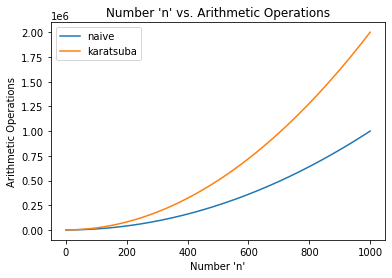

In [173]:
# probably going to need to reset it to zero each time to accurately caputre the 
# plot, as a function of n, 
# need to go through and feed examples of each array, then use those arrays


import pandas as pd
import numpy as np
# name columns
cols = ['naive', 'karatsuba']
# create dataframe
df2 = pd.DataFrame(columns=cols, index=range(0, 1001, 5))

#need to loop through from 1 to 1000
for a in range(0, 1001, 5):
#make an array of that size with a coefficient there -- for simplicity let's just make it all 2 
#becuase 1 and 0 have weird multiplication rules
    #reset count time to zero
    count_time = 0 
    # read in a digits of pi
    M = read_pi(a)
    # add time to run for naive algorithm
    df2.loc[a].naive = multi_poly(M,M)[2]
    # add time to run for 'fast' algorithm
    df2.loc[a].karatsuba = karat_multi_poly(M,M)[2]

# plot the data against itself
df2.plot(title = 'Number \'n\' vs. Arithmetic Operations', xlabel= 'Number \'n\'', ylabel= 'Arithmetic Operations')


At roughly what n does Karatsuba beat Naive (if at all)? (5 points)
# Karatsuba beats Native around n = ____.

Is there a discrepancy in the two n’s you get above? Can you explain this?
# There is a discrepancy between the n where Karatsuba beats the Native 
because naive takes n squares and karatsuba takes 

#### (iii) Write code which takes input a number C > 0, and returns a plot where the x-axis has integers 1 to 200 in increments of 1, and which overlays Karatsuba’s time in terms of number of arithmetic operations (as in part (ii)) with the curve y(n) := C · nlog2 3. 

In [174]:
# take as C input a real number
# returns a 

import pandas as pd
import numpy as np
# name columns
cols = ['karatsuba', 'logarithm']
# create dataframe
df3 = pd.DataFrame(columns=cols, index=range(1, 200, 1))

def plot_compare(C):
    # ensure that only takes input number C greater than or equal to 0
    if C <= 0:
        return
    else:
        for a in range(1, 200, 1):
            #reset global variable count time to zero 
            count_time = 0
            # read in a digits of pi
            M = read_pi(a)
            # add arithmetic operation time for karatsuba
            df3.loc[a].karatsuba = karat_multi_poly(M,M)[2]
            df3.loc[a].logarithm = (C * a * math.log(3, 2))
    df3.plot(title = 'Number \'n\' vs. Arithmetic Operations', xlabel= 'Number \'n\'', ylabel= 'Arithmetic Operations')


For what value of C, to the nearest integer, do you see the two curves “matching” (if at all)? That should give an idea of how big a constant is big-Oh hiding. (5 points)
# 

In [162]:
count_time = 0
karat_multi_poly([3, 4],[2, 3])

([6, 17, 12], 5.0067901611328125e-06, 5)

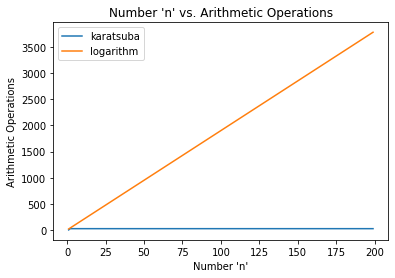

In [192]:
count_time = 0
plot_compare(12)

#### Credit Statement: 
Partner Mia Dong. 
Discussion with Tucker Simpson, Charlie Baker, Will Kallikman, Sherry Liu.